# <b>Insurance</b>

1. [Import Data and Packages](#import)
2. [Prepare Data](#prepare)
3. [Exploratory Data Analysis](#exploratory)

## <b>Import Packages and Data</b><a id='import'></a>

In [1]:
# Import Packages
import numpy as np 
import pandas as pd

In [2]:
# Read data
try:
    insure = pd.read_csv('/Users/kellyshreeve/Desktop/Data-Sets/insurance_us.csv')
except:
    insure = pd.read_csv('/datasets/insurance_us.csv')

In [3]:
# Print info
print(insure.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              5000 non-null   int64  
 1   Age                 5000 non-null   float64
 2   Salary              5000 non-null   float64
 3   Family members      5000 non-null   int64  
 4   Insurance benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None


There are 5000 rows in the dataset and no missing values. All data types are correct.

In [5]:
# Print head
display(insure.head(10))

,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


### Read data conclusions

This dataset contains 5 columns and 5000 rows. Columns represent insurance clients' gender, age, salary, number of family members, and insurance benefits. Column names need to be changed to snake case. There are no missing values.

## <b>Prepare Data<b><a id='prepare'></a>

### Fix columns names

In [8]:
# Change columns to snake case
insure.columns = insure.columns.str.lower().str.replace(' ', '_')

print(insure.columns)

Index(['gender', 'age', 'salary', 'family_members', 'insurance_benefits'], dtype='object')


Columns are converted to snake case.

### Check for Duplicates

In [10]:
# Check for full duplicates
num_duplicates = insure.duplicated().sum()

print(f'The number of fully duplicated rows: {num_duplicates}')

The number of fully duplicated rows: 153


While there are duplicated rows, this is likely due to multiple people sharing the same gender, age, salary, family members, and insurance benefits. These duplicates will be left in the dataset.

### Add additional Features

In [17]:
# Add binary filed claim variable where
# 0 = filed no claims and 1 = filed at least one claime
insure['filed_claim'] = np.where(insure['insurance_benefits'] > 0, 1, 0)

display(insure.head())

,gender,age,salary,family_members,insurance_benefits,filed_claim
0,1,41.0,49600.0,1,0,0
1,0,46.0,38000.0,1,1,1
2,0,29.0,21000.0,0,0,0
3,0,21.0,41700.0,2,0,0
4,1,28.0,26100.0,0,0,0


### <b>Exploratory Data Analysis</b><a id='exploratory'></a>

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'family_members'}>,
        <Axes: title={'center': 'insurance_benefits'}>]], dtype=object)

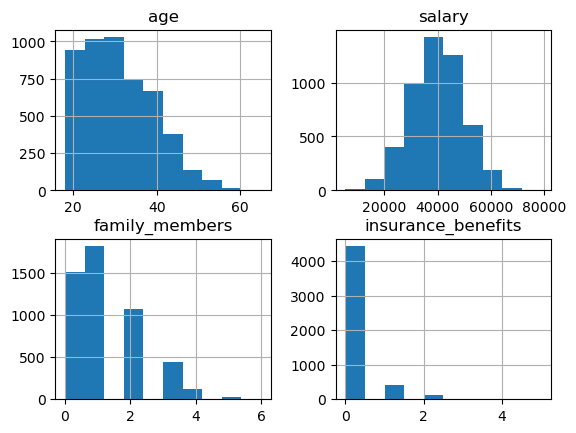

In [21]:
# Histograms of age, salary, family members, and insurance benefits
insure.iloc[:, 1:5].hist()

In [22]:
# Frequency table of insurance benefits
freq_table_benefits = insure['insurance_benefits'].value_counts()

freq_table_claim = insure['filed_claim'].value_counts()

print(f'{freq_table_benefits}')
print(f'{freq_table_claim}')

0    4436
1     423
2     115
3      18
4       7
5       1
Name: insurance_benefits, dtype: int64
0    4436
1     564
Name: filed_claim, dtype: int64
